First, we import our necessary libraries and import our desired csv file.

Next, we print our value_counts, descriptions, histograms, and bar plots for each of the columns, minus the categorical columns which have too many distinct values to display properly.

After this, we print out a few figures, consisting of figures comparing two different columns, in various plots 

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pylab as plt
df = pd.read_csv('../data/archive/cox-violent-parsed_filt.csv')

27 12
7453.0     1
5390.0     1
10683.0    1
10422.0    1
5089.0     1
          ..
3665.0     1
1197.0     1
8533.0     1
10479.0    1
1.0        1
Name: id, Length: 11001, dtype: int64
brandon ross        13
valerie agostino    13
paul simpson        11
kimani ogarro       11
eric redmond        11
                    ..
everley davis        1
jeffery turcotte     1
todd gologorsky      1
alberto pagan        1
roger browne         1
Name: name, Length: 10855, dtype: int64
michael        421
christopher    245
anthony        233
james          211
john           209
              ... 
daritte          1
teshane          1
kamille          1
fuquan           1
chantell         1
Name: first, Length: 3876, dtype: int64
williams           239
johnson            224
smith              209
brown              205
jones              168
                  ... 
veasy                1
adeyemiorigho        1
suffrin              1
raphel               1
mercado quijano      1
Name: last, Length

FileNotFoundError: [Errno 2] No such file or directory: '../figures/sex.png'

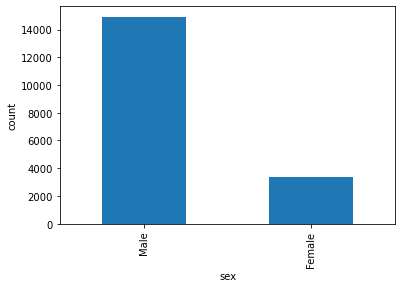

In [2]:
cols_cat = ['id','name','first','last','sex','dob','age_cat','race','c_charge_degree','c_charge_desc','is_recid','r_charge_degree','r_offense_date','r_jail_in','is_violent_recid','vr_charge_degree','vr_offense_date','vr_charge_desc','type_of_assessment','c_jail_in','c_jail_out','r_charge_desc','score_text','screening_date','v_type_of_assessment','v_score_text','event']
cols_cont = ['age','juv_fel_count','decile_score','juv_misd_count','juv_other_count','priors_count','days_b_screening_arrest','c_days_from_compas','r_days_from_arrest','decile_score.1','v_decile_score','priors_count.1']
print(len(cols_cat),len(cols_cont))

for col in cols_cat:
    print(df[col].value_counts())
    if len(df[col].value_counts()) < 50:
        df[col].value_counts().plot.bar()
        plt.ylabel('count')
        plt.xlabel(col)
        figtitle = '../figures/' + col + '.png'
        plt.savefig(figtitle, dpi=300, format='png')
        plt.show()
for col in cols_cont:
    print(df[col].describe())
    df[col].plot.hist()
    plt.ylabel("count")
    figtitle = '../figures/' + col + '.png'
    plt.savefig(figtitle, dpi=300, format='png')
    plt.show()



In [ ]:
count_matrix = df.groupby(['race', 'decile_score']).size().unstack()

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
fig = count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('Fraction of people with score')
plt.xlabel("Race")
plt.legend(loc=(1,0))

fig.text(2.5,-.7,"This graph shows the fraction of each race that is assigned a given decile score.\n Note that there are much fewer Asian and Native American samples here than the others.", ha='center')
figtitle = '../figures/race_v_decile.png'
plt.savefig(figtitle, dpi=300, format='png')
plt.show()

In [ ]:
count_matrix = df.groupby(['race', 'event']).size().unstack()

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
fig = count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('Fraction of people with score')
plt.xlabel("Race")
plt.legend(loc=(1,0))

fig.text(0,-.7,"This graph shows the fraction of each race that has recidivised.\n Again, note fewer Asian or Native American samples.")
figtitle = '../figures/race_v_recid.png'
plt.savefig(figtitle, dpi=300, format='png')
plt.show()

In [ ]:
dataset = [df[df['event']==1]['decile_score'].values,
           df[df['event']==0]['decile_score'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['Recidivists','Non-recidivists'])
plt.ylabel('decile_score')
plt.xlabel("This graph shows the distribution of decile scores, for those who later recidivise and those who don't")
figtitle = '../figures/recid_v_decile.png'
plt.savefig(figtitle, dpi=300, format='png')
plt.show()

In [ ]:
fig = df.plot.scatter('priors_count','decile_score',s=10,alpha=0.1) # alpha=0.1,s=10
fig.text(2,-5,"This scatter plot shows the relationship between the number of\n prior offenses committed and the decile score received.")
figtitle = '../figures/priors_v_decile.png'
plt.savefig(figtitle, dpi=300, format='png')
plt.show()

Now we perform the preprocessing

In [ ]:
from sklearn.model_selection import train_test_split 

redundant_cols = []
extra_cols = []
current_cols = []
target_column = "decile_score"